## Assignment 1: Question 3


---

Samarth Kumar


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Preprocess Data

In [101]:
def preprocess(data):

    # Extract target variable
    X = data.drop(columns=['date', 'Appliances'], axis=1)
    Y = data['Appliances']

    # Convert to numpy
    X = X.to_numpy()
    Y = Y.to_numpy().reshape(-1, 1)  # Ensure trainy is 2D

    return X, Y

In [102]:
  # Load the data
train = pd.read_csv('energy_train.csv')
test = pd.read_csv('energy_test.csv')
# Preprocess the data
trainx, trainy = preprocess(train)
testx, testy = preprocess(test)

In [103]:
trainx.shape

(9868, 25)

In [104]:
trainy.shape

(9868, 1)

In [105]:
trainx = trainx.astype(float)
trainy = trainy.astype(float)

train the SGD ridge model

In [82]:
class RidgeSGD:
    def __init__(self, learning_rate, batch_size, alpha):
        # Parameters to experiment with.
        self.learning_rate = learning_rate
        self.batch_size = batch_size

        # Others
        self.num_epochs = 250
        self.alpha = alpha
        self.weights = None
        self.bias = None

    # Train the ridge regression model.
    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = np.random.randn()

        # Initialize the dictionary for epoch and loss
        epoch_loss = {}

        # Stochastic gradient descent.
        for epoch in range(self.num_epochs):
            # Shuffle data.
            indices = np.random.permutation(n_samples)
            X_rand, y_rand = X[indices], y[indices]

            for i in range(0, n_samples, self.batch_size):
                # Randomly select a batch.
                max_batch = self.batch_size + i
                X_b = X_rand[i: max_batch]
                y_b = y_rand[i: max_batch]

                # Compute gradients.
                grad_weights, grad_bias = self.gradient(X_b, y_b)

                # Gradient clipping (to prevent instability)
                # Consulted StackOverflow and NumPy documentation.
                grad_weights = np.clip(grad_weights, -1e3, 1e3)
                grad_bias = np.clip(grad_bias, -1e3, 1e3)

                # Update weights and bias
                self.weights -= self.learning_rate * grad_weights
                self.bias -= self.learning_rate * grad_bias

            # Calculate loss and update dictionary.
            y_pred = np.dot(X, self.weights) + self.bias
            loss = self.mean_squared_error(y, y_pred)
            epoch_loss[epoch] = loss

        # Return the dictionary where key is the epoch number and value is its corresponding
        return epoch_loss


    # Compute Gradient.
    def gradient(self, X, y):
        n = X.shape[0]

        # Calculate predictions and error.
        y_pred = np.dot(X, self.weights) + self.bias
        error = y_pred - y.flatten()

        # Calculate the gradient.
        dW = (np.dot(X.T, error) / n) + (2 * self.alpha * self.weights)
        dB = np.mean(error)

        return dW, dB

    # Calculate Loss using mean squared error (MSE).
    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    # Create predictions.
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [78]:
# Train the model on the dataset.
model = RidgeSGD(
    learning_rate=0.0001,
    batch_size=500,
    alpha=1.0
)

epoch_loss = model.train(trainx, trainy)
# Predict on training data
y_pred = model.predict(testx)

In [79]:
# Print the dictionary
for epoch, loss in epoch_loss.items():
    print(f"Epoch {epoch+1}: Loss {loss:.4f}")

Epoch 1: Loss 19653.8829
Epoch 2: Loss 18842.2678
Epoch 3: Loss 18440.9887
Epoch 4: Loss 18159.5881
Epoch 5: Loss 18006.2497
Epoch 6: Loss 17897.2309
Epoch 7: Loss 17834.0552
Epoch 8: Loss 17795.1531
Epoch 9: Loss 17786.6669
Epoch 10: Loss 17765.4355
Epoch 11: Loss 17762.5014
Epoch 12: Loss 17762.0291
Epoch 13: Loss 17772.8505
Epoch 14: Loss 17780.1955
Epoch 15: Loss 17785.0573
Epoch 16: Loss 17798.6310
Epoch 17: Loss 17821.0035
Epoch 18: Loss 17810.2954
Epoch 19: Loss 17784.0540
Epoch 20: Loss 17774.6430
Epoch 21: Loss 17766.5927
Epoch 22: Loss 17784.9961
Epoch 23: Loss 17787.9051
Epoch 24: Loss 17778.6761
Epoch 25: Loss 17802.3654
Epoch 26: Loss 17796.0302
Epoch 27: Loss 17784.7013
Epoch 28: Loss 17783.1019
Epoch 29: Loss 17793.3428
Epoch 30: Loss 17781.8278
Epoch 31: Loss 17770.7283
Epoch 32: Loss 17768.0199
Epoch 33: Loss 17769.1832
Epoch 34: Loss 17777.0462
Epoch 35: Loss 17778.8117
Epoch 36: Loss 17766.4508
Epoch 37: Loss 17763.9898
Epoch 38: Loss 17782.9534
Epoch 39: Loss 17764.

## 3b)

### Testing different learning rates
(0.00001, 0.01, 10)

Selected 0.00001 for part c.

In [83]:
# Train the model on the dataset.
small_lr = RidgeSGD(
    learning_rate=0.00001,
    batch_size=500,
    alpha=1.0
)

output1 = model.train(trainx, trainy)
# Predict on training data
y_pred1 = model.predict(testx)

# Train the model on the dataset.
med_lr = RidgeSGD(
    learning_rate=0.01,
    batch_size=500,
    alpha=1.0
)

output2 = model.train(trainx, trainy)
# Predict on training data
y_pred2 = model.predict(testx)

# Train the model on the dataset.
large_lr = RidgeSGD(
    learning_rate=10,
    batch_size=500,
    alpha=1.0
)

output3 = model.train(trainx, trainy)
# Predict on training data
y_pred3 = model.predict(testx)


Display the results in a graph

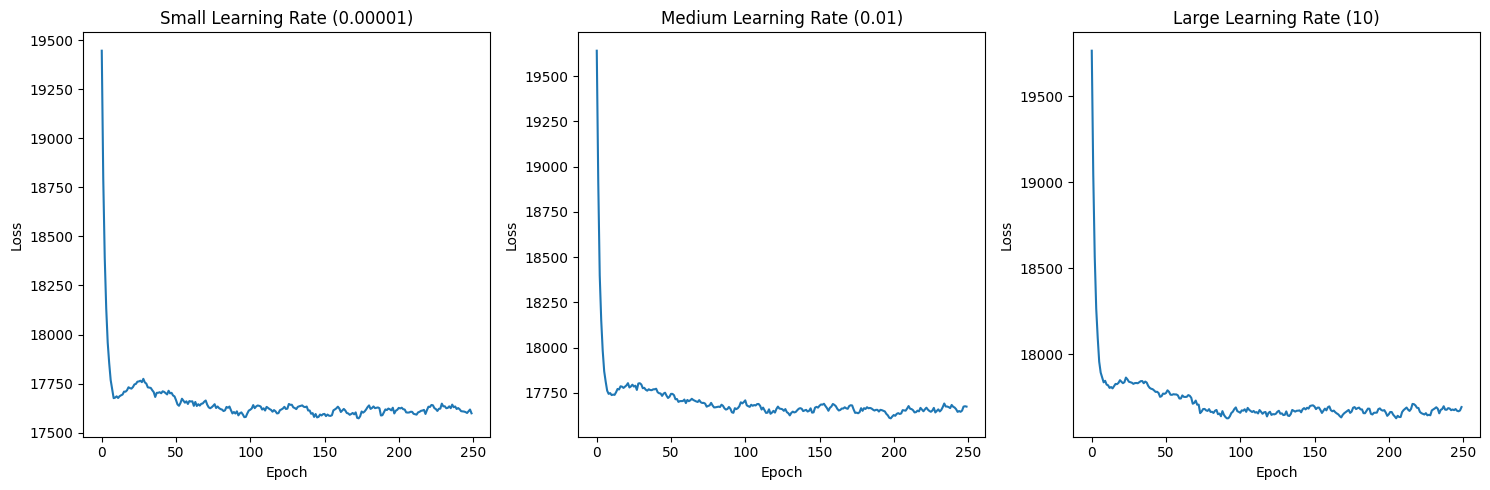

In [92]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].plot(output1.keys(), output1.values(), label='Small Learning Rate')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Small Learning Rate (0.00001)')

ax[1].plot(output2.keys(), output2.values(), label='Medium Learning Rate')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Medium Learning Rate (0.01)')

ax[2].plot(output3.keys(), output3.values(), label='Large Learning Rate')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].set_title('Large Learning Rate (10)')

plt.tight_layout()
plt.show()

## 3c)
### Testing different batch sizes with the learning rate selected from 3b.

Batch sizes: 50, 500, 1500.

In [106]:
# Small Batch Size
small_batch = RidgeSGD(
    learning_rate=0.00001,
    batch_size=50,
    alpha=1.0
)

output4 = model.train(trainx, trainy)
y_pred4 = model.predict(testx)

# Medium Batch Size
med_batch = RidgeSGD(
    learning_rate=0.00001,
    batch_size=500,
    alpha=1.0
)

output5 = model.train(trainx, trainy)
y_pred5 = model.predict(testx)

# Large Batch Size
large_batch = RidgeSGD(
    learning_rate=0.00001,
    batch_size=1500,
    alpha=1.0
)

output6 = model.train(trainx, trainy)
y_pred6 = model.predict(testx)

Plot the results

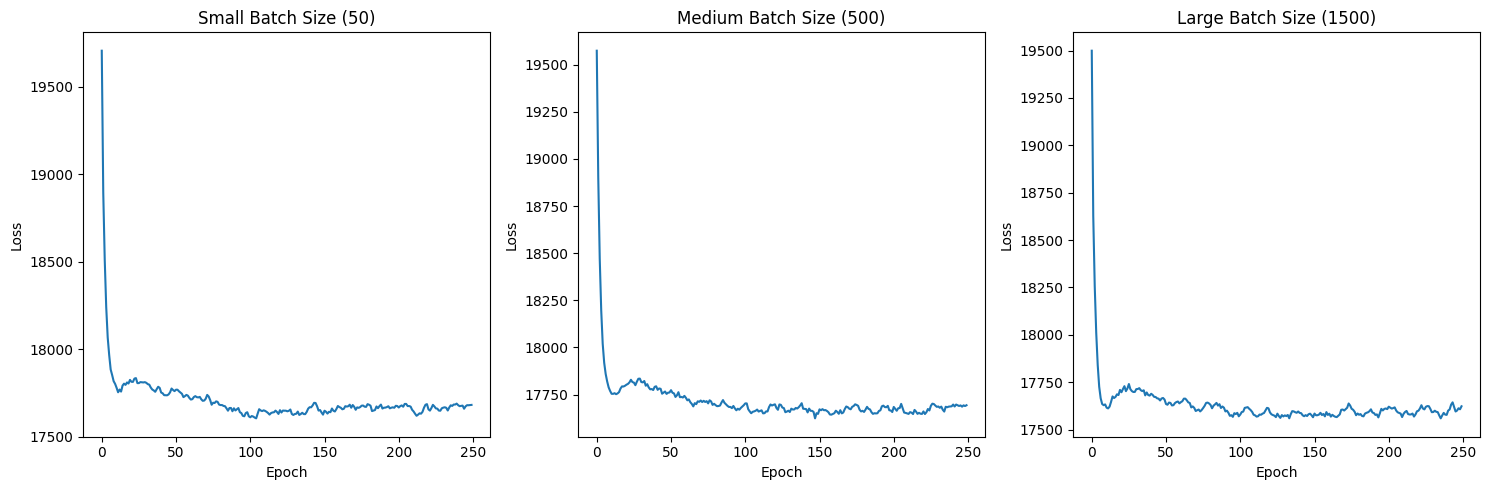

In [107]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].plot(output4.keys(), output4.values(), label='Small Batch Size')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Small Batch Size (50)')

ax[1].plot(output5.keys(), output5.values(), label='Medium Batch Size')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Medium Batch Size (500)')

ax[2].plot(output6.keys(), output6.values(), label='Large Batch Size')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].set_title('Large Batch Size (1500)')

plt.tight_layout()
plt.show()